## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Question 1

In [2]:
table = [
    [31, 18],
    [13, 20],
    [23, 39],
    [46, 16],
    [20, 18],
    [14, 38],
    [17, 13],
    [47, 20],
    [13, 39],
    [45, 7]
]
cols = ['using aids', 'not using aids'] 

df = pd.DataFrame(table, columns=cols)

In [3]:
df

,using aids,not using aids
0,31,18
1,13,20
2,23,39
3,46,16
4,20,18
5,14,38
6,17,13
7,47,20
8,13,39
9,45,7


### mean and standard deviation

In [4]:
print("mean of table")
df.mean()

mean of table


using aids        26.9
not using aids    22.8
dtype: float64

In [5]:
print("standard deviation of table")
df.std()

standard deviation of table


using aids        14.247417
not using aids    11.593101
dtype: float64

### a. Hypothesis

- H0 : There is no significant effect of young adults were receive monetary aid to join workforce than not receive monetary aid
- H1 : There is significant effect of young adults were recieve monetary aid to join workforce than not receive monetary aid

In [6]:
h0 = "There is no significant effect of young adults were receive monetary aid to join workforce than not receive monetary aid"
h1 = "There is significant effect of young adults were recieve monetary aid to join workforce than not receive monetary aid"

### b. t-test

In [7]:
t_statistic, p_value = stats.ttest_ind(df['using aids'], df['not using aids'], equal_var=False)

In [8]:
t_statistic

0.7058598324591097

In [9]:
p_value

0.48968004037603874

### c. Significant differene

In [10]:
if p_value < 0.05:
    print(h1)
else:
    print(h0)

There is no significant effect of young adults were receive monetary aid to join workforce than not receive monetary aid


## Question 2

### 1. Exploratoy Data Analysis

In [11]:
df_meta = pd.read_csv("data/pdb_data_no_dups.csv")
df_seq = pd.read_csv("data/pdb_data_seq.csv")

#### Protein Meta Data

In [12]:
df_meta.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

##### - Structure ID

<Axes: xlabel='structureId'>

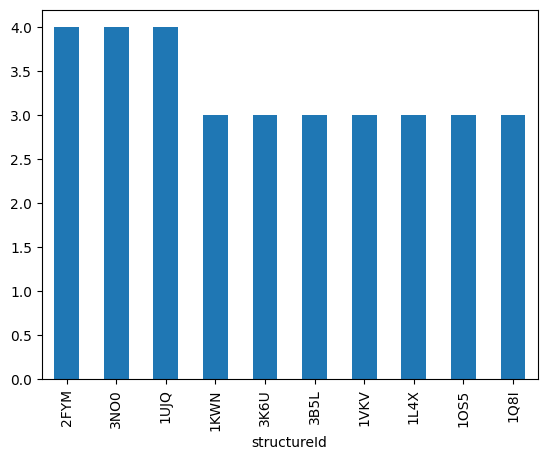

In [13]:
df_meta['structureId'].value_counts()[:10].plot(kind='bar')

In [14]:
temp = df_meta['structureId'].nunique() / len(df_meta)
print(f'Distribution of uniqueness of structureId Data {temp}')

Distribution of uniqueness of structureId Data 0.9965346779725744


StructureId is an Identifier code for strucutral protein for that dataset because of the percentage uniqueness and unique values  

##### - Classification

<Axes: xlabel='classification'>

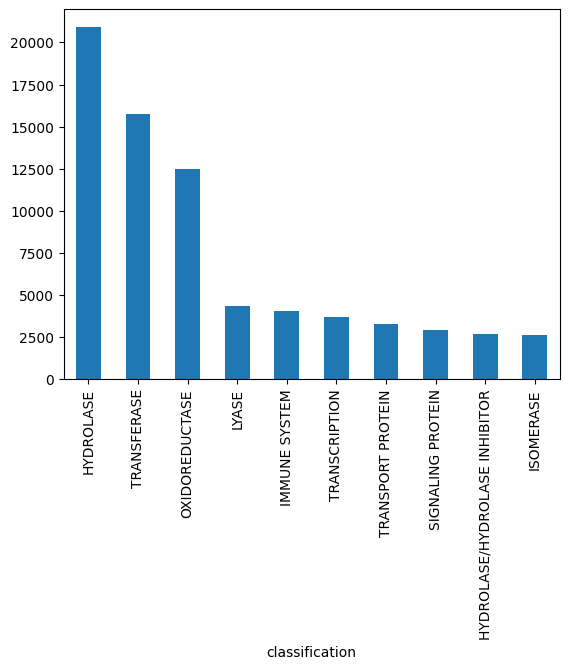

In [15]:
df_meta['classification'].value_counts()[:10].plot(kind='bar')

In [16]:
temp = df_meta['classification'].nunique() / len(df_meta)
print(f'Distribution of uniqueness of classification Data {temp}')

Distribution of uniqueness of classification Data 0.03571403313979392


classification is protein classification or protein type

##### - Experimental Technique

<Axes: xlabel='experimentalTechnique'>

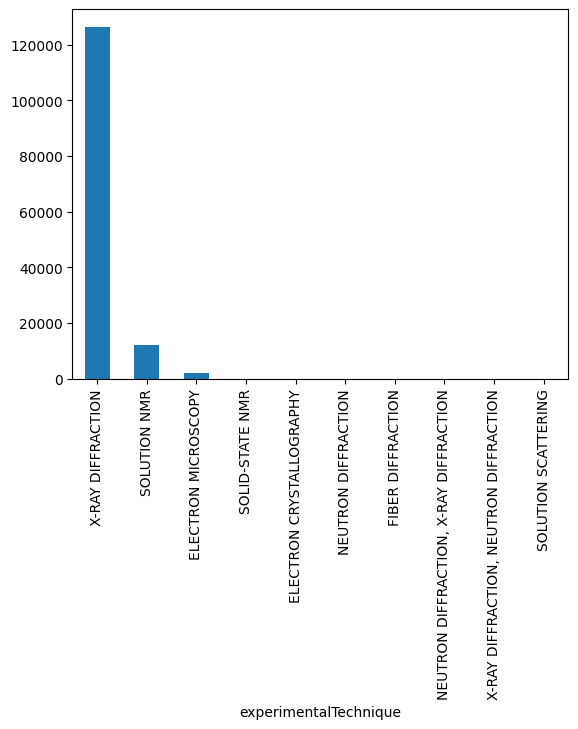

In [17]:
df_meta['experimentalTechnique'].value_counts()[:10].plot(kind='bar')

In [18]:
temp = df_meta['experimentalTechnique'].nunique()
print(f'Unique count of experimentalTechnique {temp}')

Unique count of experimentalTechnique 33


experimentalTechnique is the type of method for biologist to observe the structural protein

##### - Macro Molecule

<Axes: xlabel='macromoleculeType'>

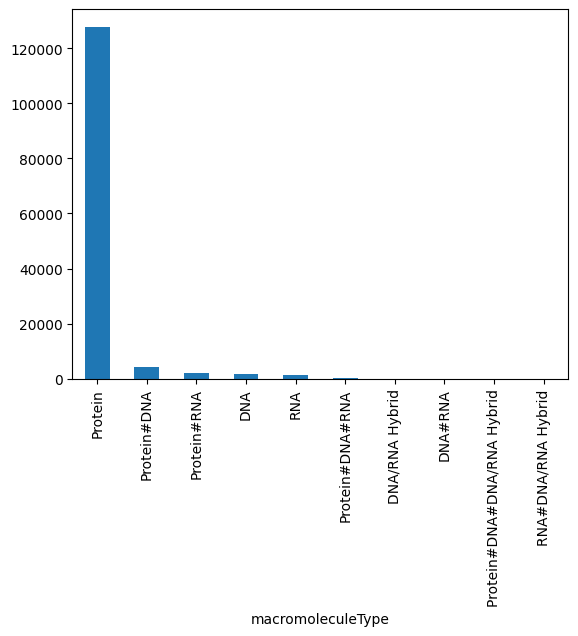

In [19]:
df_meta['macromoleculeType'].value_counts()[:10].plot(kind='bar')

In [20]:
temp = df_meta['macromoleculeType'].nunique()
print(f'Unique count of macromoleculeType {temp}')

Unique count of macromoleculeType 13


macromoleculeType is the type of protein macro molecule, where macromolecule is large organic molecules.

Reference : https://sciencenotes.org/macromolecules-definition-types-examples/

##### - Residue Count

<Axes: ylabel='Density'>

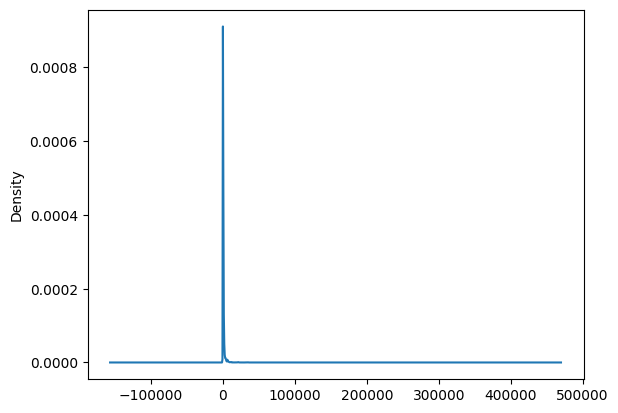

In [21]:
df_meta['residueCount'].plot(kind='kde')

<Axes: ylabel='Density'>

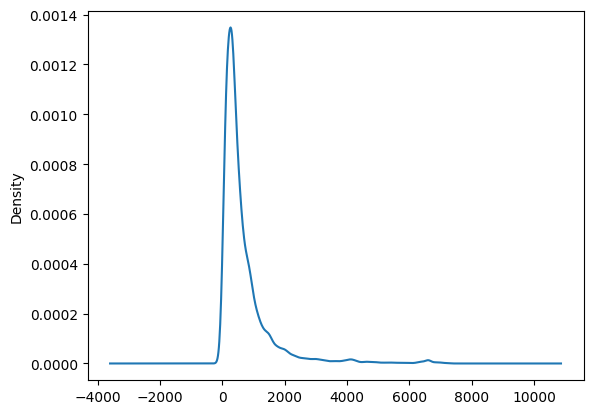

In [22]:
q1 = df_meta['residueCount'].quantile(0.01)
q9 = df_meta['residueCount'].quantile(0.99)

temp = df_meta[(q1 < df_meta['residueCount']) & (df_meta['residueCount'] < q9)]['residueCount']

temp.plot(kind='kde')

residueCount is the residue that contains in that structural protein. From that plot we know that is the high residue is rare than low residue in the protein 

##### - Resolution

<Axes: ylabel='Density'>

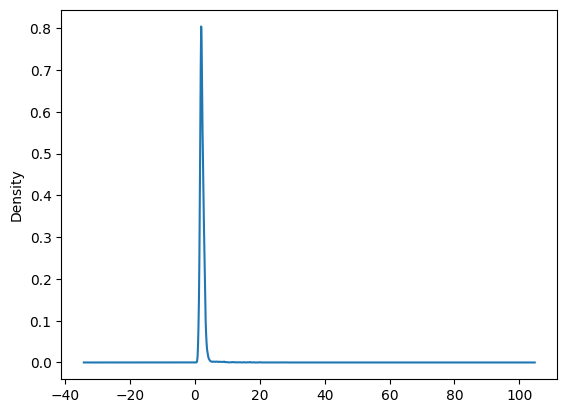

In [23]:
df_meta['resolution'].plot(kind='kde')

<Axes: ylabel='Density'>

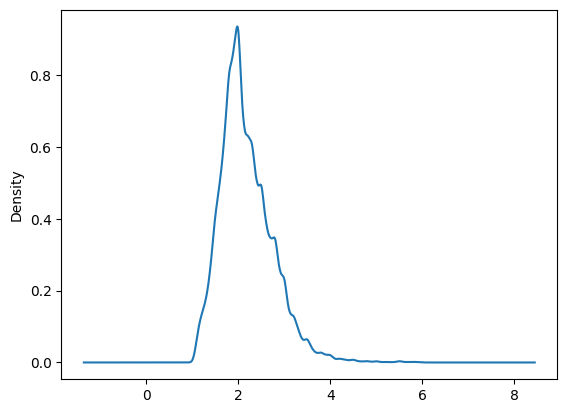

In [24]:
q1 = df_meta['resolution'].quantile(0.01)
q9 = df_meta['resolution'].quantile(0.99)

temp = df_meta[(q1 < df_meta['resolution']) & (df_meta['resolution'] < q9)]['resolution']

temp.plot(kind='kde')

resolution is refer to the images or maps clarity level of molecular structure from scientific experiments.

Reference : https://en.wikipedia.org/wiki/Resolution_(structural_biology)

##### - Structure Molecular Weight

<Axes: ylabel='Density'>

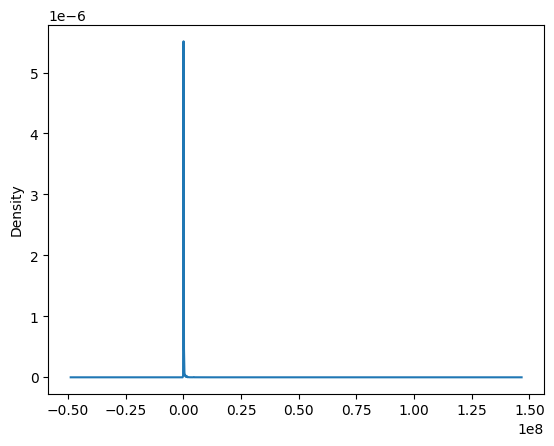

In [25]:
df_meta['structureMolecularWeight'].plot(kind='kde')

<Axes: ylabel='Density'>

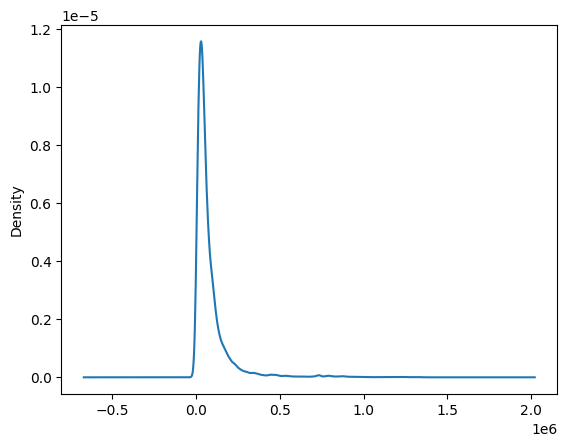

In [26]:
q1 = df_meta['structureMolecularWeight'].quantile(0.01)
q9 = df_meta['structureMolecularWeight'].quantile(0.99)

temp = df_meta[(q1 < df_meta['structureMolecularWeight']) & (df_meta['structureMolecularWeight'] < q9)]['structureMolecularWeight']

temp.plot(kind='kde')

structureMolecularWeight is weight or mass of protein molecule.

##### - Crystallization Method

<Axes: xlabel='crystallizationMethod'>

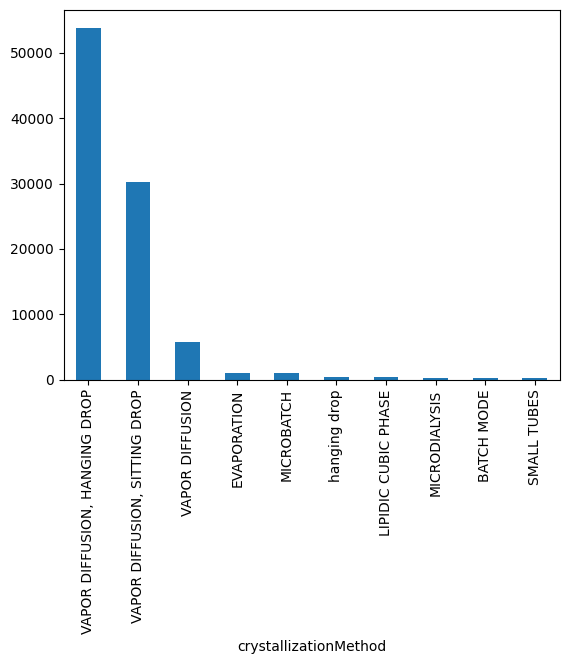

In [27]:
df_meta['crystallizationMethod'].value_counts()[:10].plot(kind='bar')

In [28]:
temp = df_meta['crystallizationMethod'].nunique()
print(f'Unique count of crystallizationMethod {temp}')

Unique count of crystallizationMethod 549


crystallizationMethod is the method of crystallization for the experiment. Where crystallization is process which solid form are organized into crystal strucrture.

Reference : https://en.wikipedia.org/wiki/Crystallization

##### - Crystallization Temp K

<Axes: ylabel='Density'>

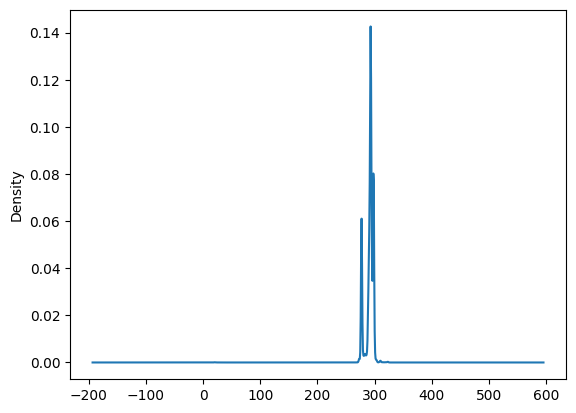

In [29]:
df_meta['crystallizationTempK'].plot(kind='kde')

<Axes: ylabel='Density'>

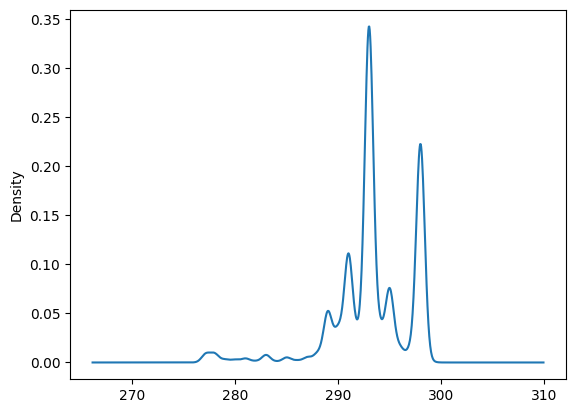

In [30]:
q1 = df_meta['crystallizationTempK'].quantile(0.01)
q9 = df_meta['crystallizationTempK'].quantile(0.99)

temp = df_meta[(q1 < df_meta['crystallizationTempK']) & (df_meta['crystallizationTempK'] < q9)]['crystallizationTempK']

temp.plot(kind='kde')

crystallizationTempK is the temperature of crystallization, the temperature in kelvin metrics. The temperature for crystallization around 270K into 300K

##### - Density Matthews

<Axes: ylabel='Density'>

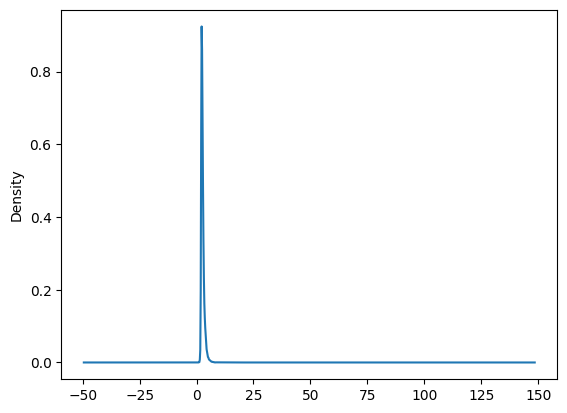

In [31]:
df_meta['densityMatthews'].plot(kind='kde')

<Axes: ylabel='Density'>

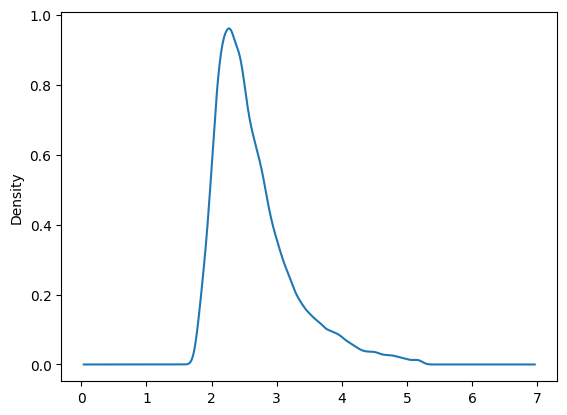

In [32]:
q1 = df_meta['densityMatthews'].quantile(0.01)
q9 = df_meta['densityMatthews'].quantile(0.99)

temp = df_meta[(q1 < df_meta['densityMatthews']) & (df_meta['densityMatthews'] < q9)]['densityMatthews']

temp.plot(kind='kde')

densityMatthews or commonly known as Matthews coefficient is a measure to calculate density of molecular

Reference : https://onlinelibrary.wiley.com/doi/pdf/10.1110/ps.0350503#:~:text=Matthews%20defined%20VM%2C%20known%20as,of%20solvent%20in%20the%20crystal

##### - Density Percent Solvent

<Axes: ylabel='Density'>

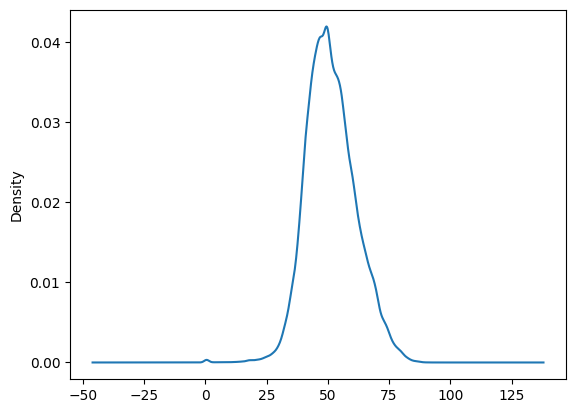

In [33]:
df_meta['densityPercentSol'].plot(kind='kde')

densityPercentSol is the percentage of solvent.

##### - pdbx Details

<Axes: xlabel='pdbxDetails'>

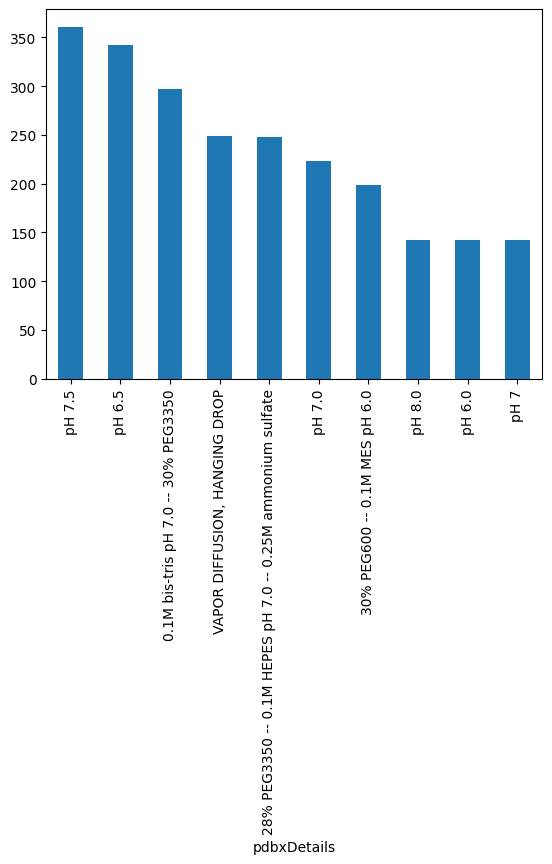

In [34]:
df_meta['pdbxDetails'].value_counts()[:10].plot(kind='bar')

In [35]:
temp = df_meta['pdbxDetails'].nunique()
print(f'Unique count of pdbxDetails {temp}')

Unique count of pdbxDetails 91025


pdbxDetails refers to details information of that experiment of the protein molecule.

Reference : https://en.wikipedia.org/wiki/Macromolecular_Crystallographic_Information_File

##### - ph Value

<Axes: ylabel='Density'>

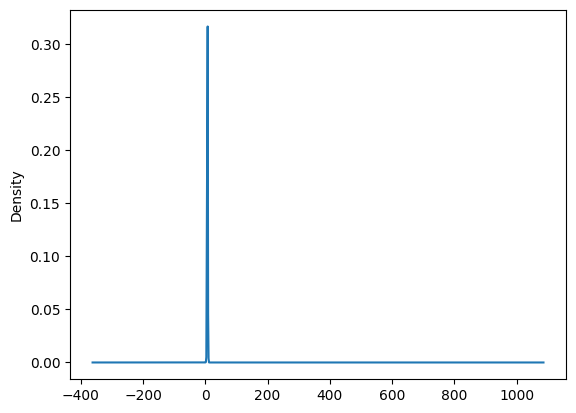

In [36]:
df_meta['phValue'].plot(kind='kde')

<Axes: ylabel='Density'>

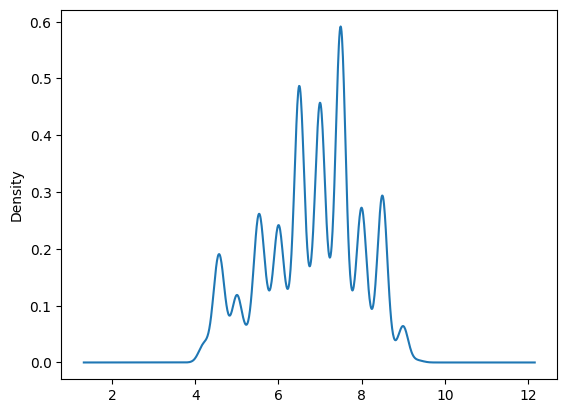

In [37]:
q1 = df_meta['phValue'].quantile(0.01)
q9 = df_meta['phValue'].quantile(0.99)

temp = df_meta[(q1 < df_meta['phValue']) & (df_meta['phValue'] < q9)]['phValue']

temp.plot(kind='kde')

phValue refer to ph condition of that experiment molecular protein

##### - Publication Year

<Axes: ylabel='Density'>

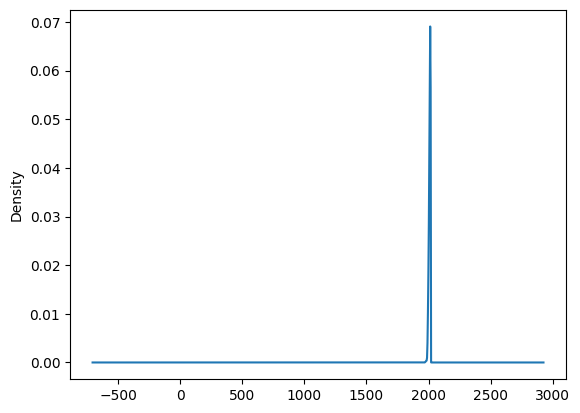

In [38]:
df_meta['publicationYear'].plot(kind='kde')

<Axes: ylabel='Density'>

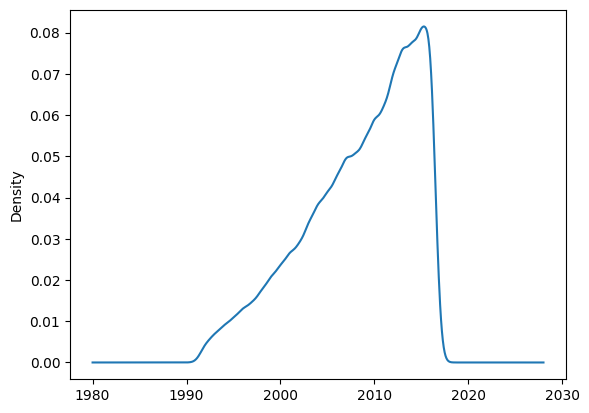

In [39]:
q1 = df_meta['publicationYear'].quantile(0.01)
q9 = df_meta['publicationYear'].quantile(0.99)

temp = df_meta[(q1 < df_meta['publicationYear']) & (df_meta['publicationYear'] < q9)]['publicationYear']

temp.plot(kind='kde')

publicationYear is the time where the experiment result published

### 2. Data Preprocessing

In [40]:
# Convert string columns into uppercase to avoid duplicate values
df_meta['crystallizationMethod'] = df_meta['crystallizationMethod'].str.upper()
df_meta['classification'] = df_meta['classification'].str.upper()
df_meta['experimentalTechnique'] = df_meta['experimentalTechnique'].str.upper()
df_meta['macromoleculeType'] = df_meta['macromoleculeType'].str.upper()
df_meta['pdbxDetails'] = df_meta['pdbxDetails'].str.upper()

In [41]:
# Dropping rows in importans columns or target columns
df_meta = df_meta.dropna(subset=['classification', 'macromoleculeType'])

,resolution,crystallizationTempK,densityMatthews,densityPercentSol,phValue
macromoleculeType,,,,,
DNA,1.85,291.5,2.240,45.655,7.00
DNA#DNA/RNA HYBRID,2.00,291.0,2.090,41.210,7.00
DNA#RNA,2.30,291.0,2.805,56.475,6.65
DNA/RNA HYBRID,1.80,293.0,2.110,41.740,6.50
PROTEIN,2.04,293.0,2.480,50.200,7.00
PROTEIN#DNA,2.40,293.0,2.690,54.290,6.50
PROTEIN#DNA#DNA/RNA HYBRID,2.25,293.0,2.650,53.605,7.50
PROTEIN#DNA#RNA,3.30,293.0,3.275,62.440,7.00
PROTEIN#DNA/RNA HYBRID,2.60,292.0,2.500,50.480,6.70


In [47]:
# Filling nan values based on macromolecule type
temp = df_meta[['resolution', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol','phValue','macromoleculeType']]
med_agg = temp.groupby('macromoleculeType').median()
cols = ['resolution', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol','phValue']

for col in cols:
    for col_type, med in med_agg[col].items():
        mask = (df_meta[col].isna()) & (df_meta['macromoleculeType'] == col_type)
        df_meta.loc[mask, col] = med

In [48]:
# Checking data drifting by publication year
thres_year = df_meta["publicationYear"].quantile(0.7)
temp_before = df_meta[df_meta["publicationYear"] < thres_year]
temp_after = df_meta[df_meta["publicationYear"] >= thres_year]
print(f'Threshold publication year : {thres_year}')

Threshold publication year : 2014.0


In [49]:
len(temp_after)

35354

<Axes: xlabel='macromoleculeType'>

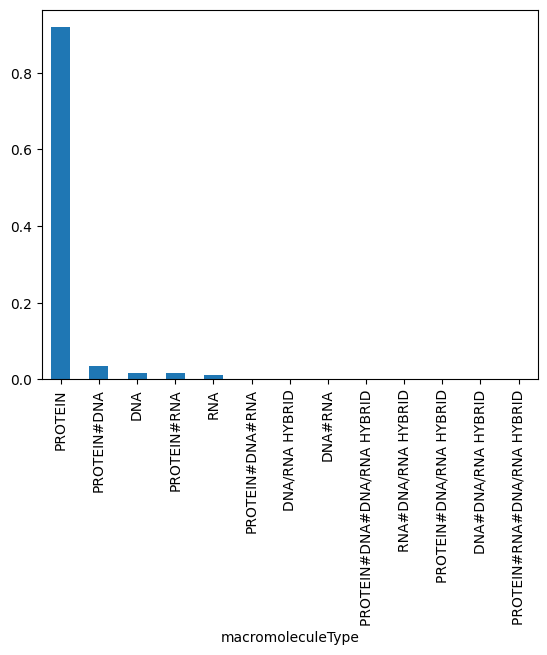

In [50]:
temp_before['macromoleculeType'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='macromoleculeType'>

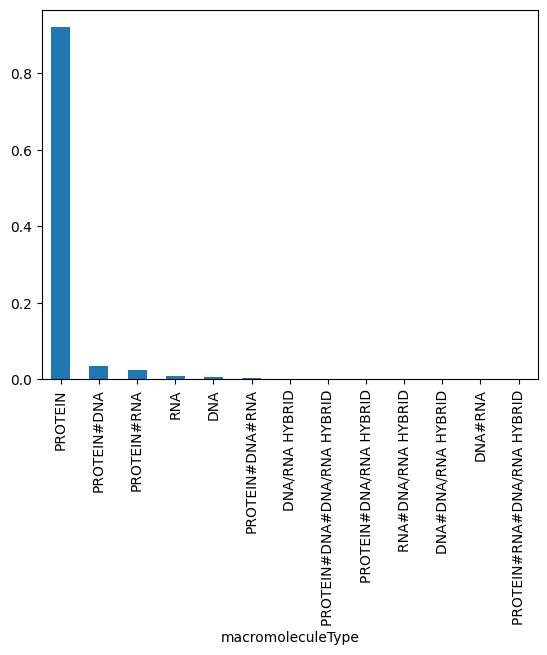

In [51]:
temp_after['macromoleculeType'].value_counts(normalize=True).plot(kind='bar')

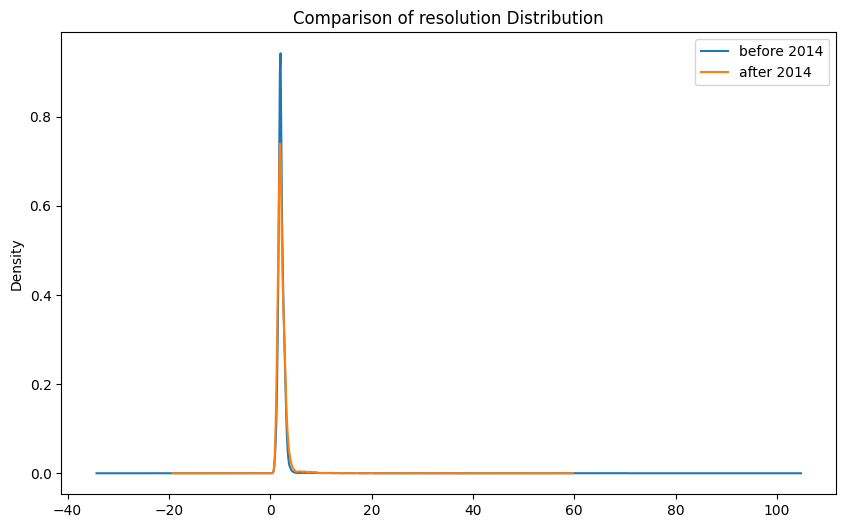

In [52]:
# Plotting
plt.figure(figsize=(10, 6))
temp_before['resolution'].plot(kind='kde',label='before 2014')
temp_after['resolution'].plot(kind='kde', label='after 2014')

plt.title('Comparison of resolution Distribution')
plt.legend()
plt.show()

From that 2 columsn that is macromolecule type and resolution, there is no data drifting because of the distribution values of that 2 columns is no significant difference. where if the data test and train have difference distribution that can lead bad prediction model because of different behaviour data, or the train data not represent the test data or latest data. 

### 3. Feature Engineering

In [53]:
# Simplify classification by usng regex (replace word after "/" and in parentheses)
pattern = r'([^(/\s(]+)'
df_meta['simple_class'] = df_meta['classification'].str.extract(pattern, expand=False)

# Use only top 14 classification
temp_class = df_meta['simple_class'].value_counts(ascending=False)[:14].index

# Change anothe classification not top 14 into other
df_meta.loc[~df_meta['simple_class'].isin(temp_class), 'simple_class'] = 'OTHER'

In [54]:
# Drop unnecessary columns because of many missing values and not related to classification
df_meta = df_meta.drop(columns=['classification', 'publicationYear', 'pdbxDetails', 'crystallizationMethod', 'experimentalTechnique'])

### 4. Modelling

In [55]:
from pycaret.classification import *

In [56]:
data = df_meta.iloc[:, 1:]

In [57]:
data.head(5)

,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,simple_class
0,DNA/RNA HYBRID,20,1.90,6360.30,293.0,1.78,30.89,7.0,OTHER
1,DNA,24,2.25,7939.35,291.5,2.00,38.45,7.0,DNA
2,PROTEIN,154,2.07,18112.80,293.0,3.09,60.20,9.0,OTHER
3,DNA,24,2.20,7637.17,277.0,2.28,46.06,7.0,DNA
4,PROTEIN,165,1.74,18926.61,293.0,2.75,55.28,7.0,HYDROLASE


In [58]:
exp_name = setup(data=data,  target='simple_class', session_id=123)

,Description,Value
0,Session id,123
1,Target,simple_class
2,Target type,Multiclass
3,Target mapping,"DNA: 0, HYDROLASE: 1, IMMUNE: 2, ISOMERASE: 3, LIGASE: 4, LYASE: 5, OTHER: 6, OXIDOREDUCTASE: 7, PROTEIN: 8, SIGNALING: 9, STRUCTURAL: 10, TRANSCRIPTION: 11, TRANSFERASE: 12, TRANSPORT: 13, VIRAL: 14"
4,Original data shape,"(137634, 9)"
5,Transformed data shape,"(137634, 21)"
6,Transformed train set shape,"(96343, 21)"
7,Transformed test set shape,"(41291, 21)"
8,Numeric features,7
9,Categorical features,1


In [59]:
best_model = compare_models(budget_time=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:00:57
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/69 [00:00<?, ?it/s]